# Turn IHT's estimated beta into a plot

In [1]:
using CSV
using DataFrames
using Plots
using DelimitedFiles
import Plots.mm

In [32]:
# import chr result
bimfile = CSV.read("ukb.merged.metabolic.subset.european.400K.QC.bim", DataFrame, header=false)
chr = bimfile[!, 1]

# phenotype name
phenotypes = ["Lipoprotein Particles", "VLDL", "LDL", "HDL", "ULDL & Ex. Large VLDL",
    "Very Large VLDL", "Large VLDL", "Medium VLDL", "Small VLDL", "Very Small VLDL",
    "IDL", "Large LDL", "Medium LDL", "Small LDL",
    "Very Large HDL", "Large HDL", "Medium HDL", "Small HDL"]

# import IHT estimated beta
result = readdlm("iht.largeIter.beta.txt", skipstart = 1)
snp_id = result[:, 3] |> Vector{String}
β = result[:, 6:end] |> Matrix{Float64};

In [33]:
maximum(β), minimum(β)

(0.01420886121236297, -0.018025415124221844)

In [22]:
count(!iszero, β)

4678

In [34]:
independent_cnt = 0
pleiotropic_cnt = 0
pleiotropic = 0
for βi in eachrow(β)
    if count(!iszero, βi) > 1
        pleiotropic_cnt += 1
        pleiotropic += count(!iszero, βi)
    elseif count(!iszero, βi) > 0
        independent_cnt += 1
    end
end
independent_cnt, pleiotropic_cnt, pleiotropic

(218, 699, 4460)

In [9]:
pleiotropic / pleiotropic_cnt

6.380543633762518

## Make plot (annotate by hand later)

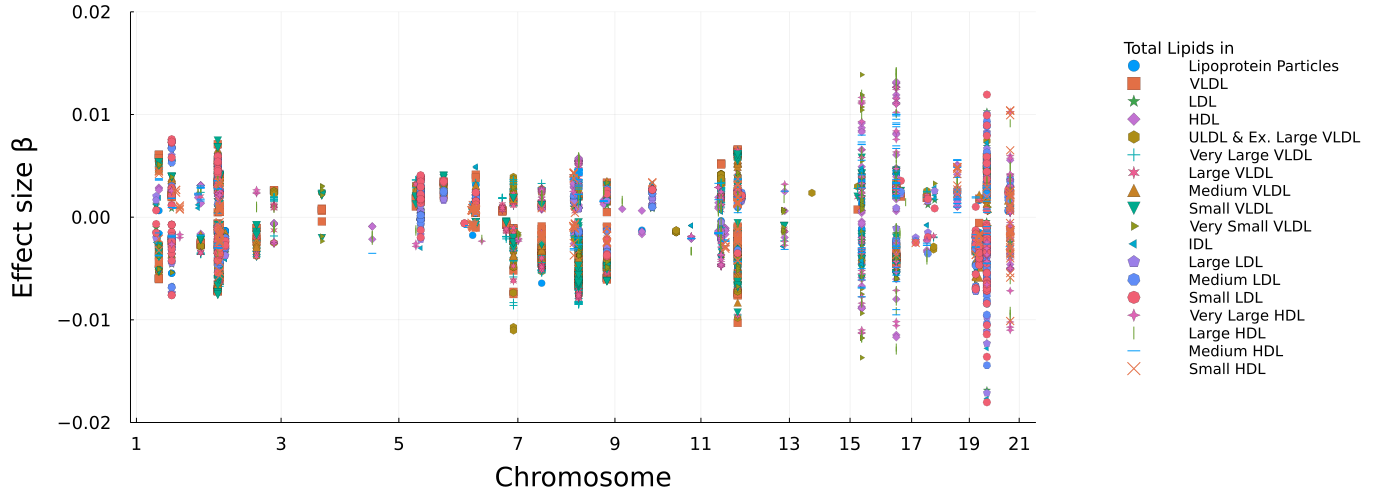

In [39]:
# find significant snps for each trait
significant_snps = [findall(!iszero, β[:, i]) for i in 1:18] 

# label x axis with chromosome
chromosomes = 1:2:22
first_appear = [findfirst(x -> x == i, chr) for i in chromosomes]

# marker shapes
shapes = [:circle, :rect, :star5, :diamond, :hexagon, :cross, :star6, 
    :utriangle, :dtriangle, :rtriangle, :ltriangle, :pentagon, 
    :heptagon, :octagon, :star4, :vline, :hline, :x]

plt = plot()
for trait in 1:18
    idx = significant_snps[trait]
    scatter!(plt, idx, β[idx, trait], label=phenotypes[trait], ylim=(-0.02, 0.02),
        size=(1400, 500), ylabel="Effect size β", xlabel="Chromosome", 
        left_margin=10Plots.mm, bottom_margin=10Plots.mm, 
        legendfont=font(10), guidefont=font(18), tickfont=font(12), axisfont=font(12), legend=:outerright,
        xticks = (first_appear, chromosomes),
        markershape=shapes[trait], markerstrokewidth=0.1,
        legendtitle="Total Lipids in", legend_title_font_halign=:right,
        foreground_color_legend = nothing,
        dpi=300
        ) 
end

plt

In [40]:
savefig(plt, "plot.png")

In [5]:
;open .

In [ ]:
# crop at: https://www.iloveimg.com/crop-image

## Interactive plot (hover over SNPs to record SNP ID)

In [41]:
plotlyjs()

# find significant snps for each trait
significant_snps = [findall(!iszero, β[:, i]) for i in 1:18] 

# label x axis with chromosome
chromosomes = 1:2:22
first_appear = [findfirst(x -> x == i, chr) for i in chromosomes]

plt = plot()
for trait in 1:18
    idx = significant_snps[trait]
    scatter!(plt, idx, β[idx, trait], label=phenotypes[trait], 
        ylabel="Effect size β", xlabel="Chromosome", 
        labelfont=font(12), guidefont=font(18), tickfont=font(14), axisfont=font(12), 
        xticks = (first_appear, chromosomes),
        markershape=:auto, markerstrokewidth=0.1,
        hover = snp_id[idx],
        dpi = 300,
        size = (1500, 600)
        )
end

plt

## Only plotting SNPs affecting >5 phenotypes

In [10]:
# import IHT result
result = readdlm("iht.beta.txt", skipstart = 1)
snp_id = result[:, 1] |> Vector{String}
β = result[:, 2:end] |> Matrix{Float64};

In [ ]:
plotlyjs()

# find pleitropic snps
pleiotropic_snps = Int[]
for (i, βi) in enumerate(eachrow(β))
    if count(!iszero, βi) ≥ 5
        push!(pleiotropic_snps, i)
    end
end

# find significant pleiotropic snps for each trait
significant_snps = [findall(!iszero, β[:, i]) ∩ pleiotropic_snps for i in 1:18] 

# label x axis with chromosome
chromosomes = 1:2:22
first_appear = [findfirst(x -> x == i, chr) for i in chromosomes]

plt = plot()
for trait in 1:18
    idx = significant_snps[trait]
    scatter!(plt, idx, β[idx, trait], label=phenotypes[trait], ylim=(-0.02, 0.02),
        ylabel="Effect size β", xlabel="Chromosome", 
        labelfont=font(12), guidefont=font(18), tickfont=font(14), axisfont=font(12), 
        xticks = (first_appear, chromosomes),
        markershape=:auto, markerstrokewidth=0.1,
        hover = snp_id[idx],
        dpi = 300,
        size = (1500, 600)
        )
end

plt

WebIO._IJuliaInit()

┌ Info: Precompiling PlotlyJS [f0f68f2c-4968-5e81-91da-67840de0976a]
└ @ Base loading.jl:1423
